In [1]:
#%matplotlib notebook
# Enable interactive plotting with widgets

#%matplotlib widget


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#%matplotlib notebook

## Load ahoi Logs

In [2]:
# Load the CSV data

## 2024-08-05 ==== 
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_183434_on_dock.csv' # still on dock
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_183728.csv' # dock and start
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_185530_in_between_runs.csv'
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_185612.csv'
file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_190152.csv'
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_190449_anchor_to_dock.csv'

## 2024-08-02 ==== First Trials

# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_093725.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_095845.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_100307_extra_mass.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_101324.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_101422.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_102117.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_102127_back to dock.csv'



### Adapt ahoi data logs

In [3]:
ahoi_df_raw = pd.read_csv(file_path)

ahoi_df_raw['timestamp'] = pd.to_datetime(ahoi_df_raw['timestamp']) + pd.to_timedelta(4, unit='h')
ahoi_df_raw['anchor_id'] = ahoi_df_raw['anchor_id'].fillna(99).astype(int)
ahoi_df_raw['target_id'] = ahoi_df_raw['target_id'].fillna(99).astype(int)

# Create a dictionary for anchor labels
# NED - 2, ABE - 6, MAX - 9
anchor_labels = {2: 'NED - 2', 6: 'ABE - 6', 9: 'MAX - 9',99: 'NA'}
anchor_colors = {2: 'red', 6: 'green', 9: 'orange'}

# Map the 'anchor_id' to 'anchor_label'
ahoi_df_raw['anchor_label'] = ahoi_df_raw['anchor_id'].map(anchor_labels)

# Display the first few rows to ensure it's loaded correctly
ahoi_df_raw.head()

,timestamp,base_id,target_id,sequence_number,event,time,anchor_id,distance,pos_x,pos_y,anchor_label
0,2024-08-05 23:01:52.165217,3,2,1,range_poll,NaN,99,NaN,NaN,NaN,NA
1,2024-08-05 23:01:52.847882,3,99,1,TOF-ACK,682.641983,2,27.9195,NaN,NaN,NED - 2
2,2024-08-05 23:01:53.323636,3,99,1,POS-ACK,1158.298969,2,NaN,32.48,-63.11,NED - 2
3,2024-08-05 23:01:53.568754,3,6,1,range_poll,NaN,99,NaN,NaN,NaN,NA
4,2024-08-05 23:01:54.970710,3,9,1,range_poll,NaN,99,NaN,NaN,NaN,NA


### Load Moos Logs

In [4]:
use_moos_logs = True
if use_moos_logs:
    # mobile node
    # file_mdm_oak = 'logs/2024-08-02_01_mdm/LOG_OAK_2_8_2024_____09_37_09/log_oak_2_8_2024_____09_37_09_alog_csvs/NODE_REPORT_LOCAL.csv'
    file_mdm_oak = 'logs/2024-08-05_01_mdm/LOG_OAK_5_8_2024_____18_34_20/log_oak_5_8_2024_____18_34_20_alog_csvs/NODE_REPORT_LOCAL.csv'
    

    # anchor node ABE - id: 6
    # file_mdm_abe = 'logs/2024-08-02_01_mdm/LOG_ABE_2_8_2024_____09_37_00/log_abe_2_8_2024_____09_37_00_alog_csvs/NODE_REPORT_LOCAL.csv'
    file_mdm_abe = 'logs/2024-08-05_01_mdm/LOG_ABE_5_8_2024_____18_34_05/log_abe_5_8_2024_____18_34_05_alog_csvs/NODE_REPORT_LOCAL.csv'


    # anchor node MAX - id: 9
    # file_mdm_max = 'logs/2024-08-02_01_mdm/LOG_MAX_2_8_2024_____09_37_03/log_max_2_8_2024_____09_37_03_alog_csvs/NODE_REPORT_LOCAL.csv'
    file_mdm_max = 'logs/2024-08-05_01_mdm/LOG_MAX_5_8_2024_____18_33_54/log_max_5_8_2024_____18_33_54_alog_csvs/NODE_REPORT_LOCAL.csv'
          
    # anchor node NED - id: 2
    # file_mdm_ned = 'logs/2024-08-02_01_mdm/LOG_NED_2_8_2024_____09_37_06/log_ned_2_8_2024_____09_37_06_alog_csvs/NODE_REPORT_LOCAL.csv'
    file_mdm_ned = 'logs/2024-08-05_01_mdm/LOG_NED_5_8_2024_____18_34_13/log_ned_5_8_2024_____18_34_13_alog_csvs/NODE_REPORT_LOCAL.csv'
                  
    df_mdm_mobile = pd.read_csv(file_mdm_oak, on_bad_lines='skip')
    df_mdm_id6 = pd.read_csv(file_mdm_abe, on_bad_lines='skip')
    df_mdm_id9 = pd.read_csv(file_mdm_max, on_bad_lines='skip')
    df_mdm_id2 = pd.read_csv(file_mdm_ned, on_bad_lines='skip')

    # Construct datetime objects for the start and end times

    print(f"Len oak {df_mdm_mobile.size}, len abe {df_mdm_id6.size}, len max {df_mdm_id9.size}, len ned {df_mdm_id2.size}")

    df_mdm_mobile['time'] = pd.to_datetime(df_mdm_mobile['time'], unit='s')

    df_mdm_id6['time'] = pd.to_datetime(df_mdm_id6['time'], unit='s')

    df_mdm_id9['time'] = pd.to_datetime(df_mdm_id9['time'], unit='s')

    df_mdm_id2['time'] = pd.to_datetime(df_mdm_id2['time'], unit='s')



Len oak 42032, len abe 140592, len max 142112, len ned 139376


## Clip data frames

In [5]:
start_utc = ahoi_df_raw['timestamp'].iloc[0]
end_utc = ahoi_df_raw['timestamp'].iloc[-1]

# Manual set new start / End
start_utc = datetime(2024, 8, 5, 23, 3, 0) 
end_utc = datetime(2024, 8, 5, 23, 4, 30)

print(f"data start at {start_utc} UTC")
print(f"data end at {end_utc} UTC")

data start at 2024-08-05 23:03:00 UTC
data end at 2024-08-05 23:04:30 UTC


### Clipping

In [6]:

ahoi_df = ahoi_df_raw[(ahoi_df_raw['timestamp'] >= start_utc) & (ahoi_df_raw['timestamp'] <= end_utc)]

if use_moos_logs:

    mdm_start_time_utc = start_utc
    mdm_end_time_utc = end_utc

    filtered_df_mdm_mobile = df_mdm_mobile[(df_mdm_mobile['time'] >= mdm_start_time_utc) & (df_mdm_mobile['time'] <= mdm_end_time_utc)]

    filtered_df_mdm_id6 = df_mdm_id6[(df_mdm_id6['time'] >= mdm_start_time_utc) & (df_mdm_id6['time'] <= mdm_end_time_utc)]
    filtered_df_mdm_id9 = df_mdm_id9[(df_mdm_id9['time'] >= mdm_start_time_utc) & (df_mdm_id9['time'] <= mdm_end_time_utc)]
    filtered_df_mdm_id2 = df_mdm_id2[(df_mdm_id2['time'] >= mdm_start_time_utc) & (df_mdm_id2['time'] <= mdm_end_time_utc)]


    # Step 1: Create a union of all time points using numpy
    common_time = np.union1d(filtered_df_mdm_mobile['time'], filtered_df_mdm_id6['time'])
    common_time = np.union1d(common_time, filtered_df_mdm_id9['time'])
    common_time = np.union1d(common_time, filtered_df_mdm_id2['time'])

    # Step 2: Interpolate data for Oak
    oak_interpolated = (
        filtered_df_mdm_mobile.set_index('time')
        .reindex(common_time)
        .interpolate(method='time')
    )

    # Step 3: Interpolate and calculate distances for each robot

    # Abe
    abe_interpolated = (
        filtered_df_mdm_id6.set_index('time')
        .reindex(common_time)
        .interpolate(method='time')
    )

    distances_abe = np.sqrt(
        (oak_interpolated['X'] - abe_interpolated['X']) ** 2 +
        (oak_interpolated['Y'] - abe_interpolated['Y']) ** 2
    ).reset_index(name='Distance_Abe')

    # Max
    max_interpolated = (
        filtered_df_mdm_id9.set_index('time')
        .reindex(common_time)
        .interpolate(method='time')
    )

    distances_max = np.sqrt(
        (oak_interpolated['X'] - max_interpolated['X']) ** 2 +
        (oak_interpolated['Y'] - max_interpolated['Y']) ** 2
    ).reset_index(name='Distance_Max')

    # Ned
    ned_interpolated = (
        filtered_df_mdm_id2.set_index('time')
        .reindex(common_time)
        .interpolate(method='time')
    )

    distances_ned = np.sqrt(
        (oak_interpolated['X'] - ned_interpolated['X']) ** 2 +
        (oak_interpolated['Y'] - ned_interpolated['Y']) ** 2
    ).reset_index(name='Distance_Ned')

    # Step 4: Combine results into a single data frame
    distances_combined = distances_abe.merge(distances_max, on='time').merge(distances_ned, on='time')



/tmp/ipykernel_11964/791423147.py:22: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  filtered_df_mdm_mobile.set_index('time')
/tmp/ipykernel_11964/791423147.py:31: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  filtered_df_mdm_id6.set_index('time')
/tmp/ipykernel_11964/791423147.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  filtered_df_mdm_id9.set_index('time')
/tmp/ipykernel_11964/791423147.py:55: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  filtered_df_mdm_id2.set_index('time')


## Analyze Reception rates ToF / Pos

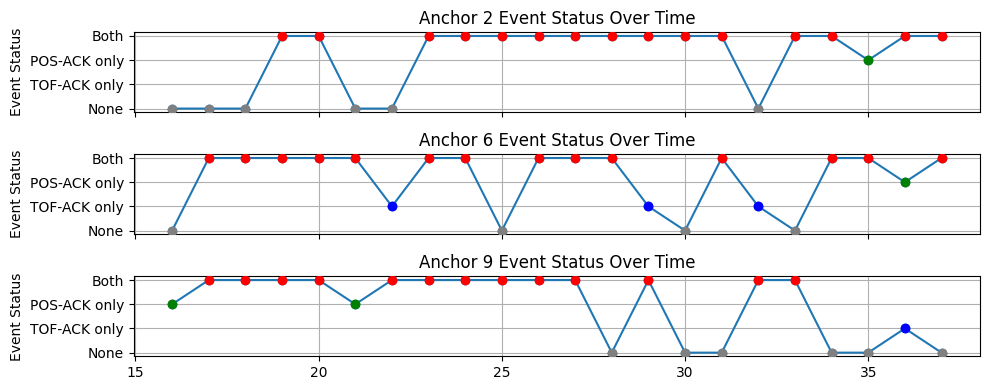

In [7]:
rec_tof_ack = ahoi_df[ahoi_df['event'] == 'TOF-ACK'][['sequence_number', 'anchor_id']]
rec_pos_ack = ahoi_df[ahoi_df['event'] == 'POS-ACK'][['sequence_number', 'anchor_id']]


# Count events per anchor
tof_counts = rec_tof_ack['anchor_id'].value_counts()
pos_counts = rec_pos_ack['anchor_id'].value_counts()

# Pivot the data to get a matrix of events
event_matrix =ahoi_df.pivot_table(index='sequence_number', columns=['anchor_id', 'event'], aggfunc='size', fill_value=0)

# Create a status column for each anchor
event_matrix['2 Status'] = event_matrix[(2, 'TOF-ACK')] + 2 * event_matrix[(2, 'POS-ACK')]
event_matrix['6 Status'] = event_matrix[(6, 'TOF-ACK')] + 2 * event_matrix[(6, 'POS-ACK')]
event_matrix['9 Status'] = event_matrix[(9, 'TOF-ACK')] + 2 * event_matrix[(9, 'POS-ACK')]



# Create a figure with subplots for each anchor and a combined plot at the bottom
fig, ax = plt.subplots(3, 1, figsize=(10, 4), sharex=True)

# Define colors for each status
colors = {
    0: 'gray',
    1: 'blue',
    2: 'green',
    3: 'red'
}

# Plot for Anchor 2
ax[0].plot(event_matrix.index, event_matrix['2 Status'], marker='o', linestyle='-')
for i, txt in enumerate(event_matrix['2 Status']):
    ax[0].scatter(event_matrix.index[i], [txt], color=colors[txt], zorder=5)
ax[0].set_title('Anchor 2 Event Status Over Time')
ax[0].set_ylabel('Event Status')
ax[0].set_yticks([0, 1, 2, 3])
ax[0].set_yticklabels(['None', 'TOF-ACK only', 'POS-ACK only', 'Both'])

# Plot for Anchor 6
ax[1].plot(event_matrix.index, event_matrix['6 Status'], marker='o', linestyle='-')
for i, txt in enumerate(event_matrix['6 Status']):
    ax[1].scatter(event_matrix.index[i], [txt], color=colors[txt], zorder=5)
ax[1].set_title('Anchor 6 Event Status Over Time')
ax[1].set_ylabel('Event Status')
ax[1].set_yticks([0, 1, 2, 3])
ax[1].set_yticklabels(['None', 'TOF-ACK only', 'POS-ACK only', 'Both'])

# Plot for Anchor 9
ax[2].plot(event_matrix.index, event_matrix['9 Status'], marker='o', linestyle='-')
for i, txt in enumerate(event_matrix['9 Status']):
    ax[2].scatter(event_matrix.index[i], [txt], color=colors[txt], zorder=5)
ax[2].set_title('Anchor 9 Event Status Over Time')
ax[2].set_ylabel('Event Status')
ax[2].set_yticks([0, 1, 2, 3])
ax[2].set_yticklabels(['None', 'TOF-ACK only', 'POS-ACK only', 'Both'])

# # Combined plot
# for anchor_id, status_column in zip([2, 6, 9], ['2 Status', '6 Status', '9 Status']):
#     ax[3].plot(event_matrix.index, event_matrix[status_column], marker='o', linestyle='-', label=f'Anchor {anchor_id}',
#                color='black')  # Using black for lines
#     for i, txt in enumerate(event_matrix[status_column]):
#         ax[3].scatter(event_matrix.index[i], [txt], color=colors[txt], zorder=5)

# # Formatting for the combined plot
# ax[3].set_title('Combined Anchor Event Status Over Time')
# ax[3].set_xlabel('Sequence Number')
# ax[3].set_ylabel('Event Status')
# ax[3].set_yticks([0, 1, 2, 3])
# ax[3].set_yticklabels(['None', 'TOF-ACK only', 'POS-ACK only', 'Both'])
# ax[3].legend(title='Anchor ID')

# Grid and layout
for a in ax:
    a.grid(True)

plt.tight_layout()
plt.show()


## Compare TOF / Ranges

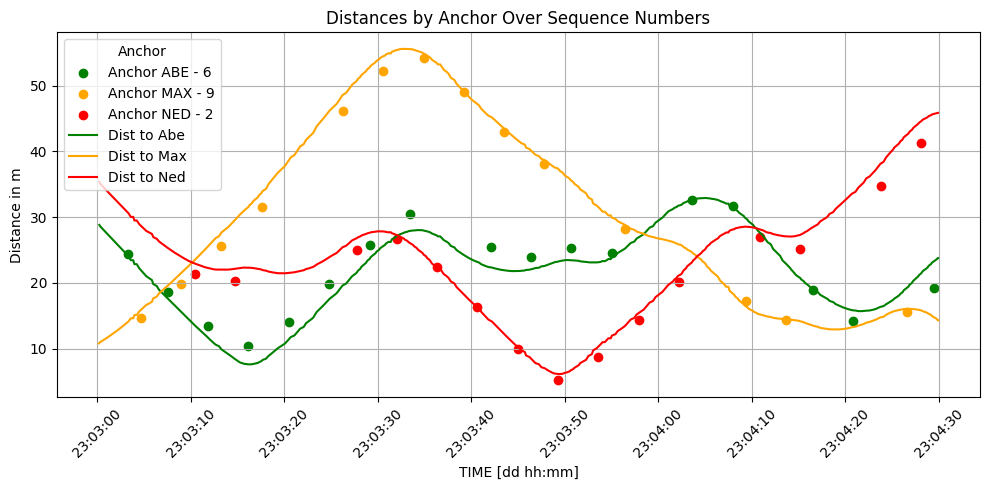

In [8]:
# Prepare data for plotting distances by anchor over sequence numbers
tof_ack_data = ahoi_df[ahoi_df['event'] == 'TOF-ACK'][['timestamp', 'anchor_id', 'distance']]

scale =  1500/ 1500

# Plot the distances by anchor over sequence numbers
plt.figure(figsize=(10, 5))
for anchor_id in tof_ack_data['anchor_id'].unique():
    anchor_data = tof_ack_data[tof_ack_data['anchor_id'] == anchor_id]
    plt.scatter(anchor_data['timestamp'], anchor_data['distance']*scale, label=f'Anchor {anchor_labels[anchor_id]}', marker='o', color=anchor_colors[anchor_id])

if use_moos_logs:
    # NED - 2, ABE - 6, MAX - 9
    plt.plot(distances_combined['time'], distances_combined['Distance_Abe'], label='Dist to Abe', color=anchor_colors[6])
    plt.plot(distances_combined['time'], distances_combined['Distance_Max'], label='Dist to Max', color=anchor_colors[9])
    plt.plot(distances_combined['time'], distances_combined['Distance_Ned'], label='Dist to Ned', color=anchor_colors[2])

plt.xlabel('TIME [dd hh:mm]')
plt.ylabel('Distance in m')
plt.title('Distances by Anchor Over Sequence Numbers')
plt.legend(title="Anchor")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## Compare Anchor Pos

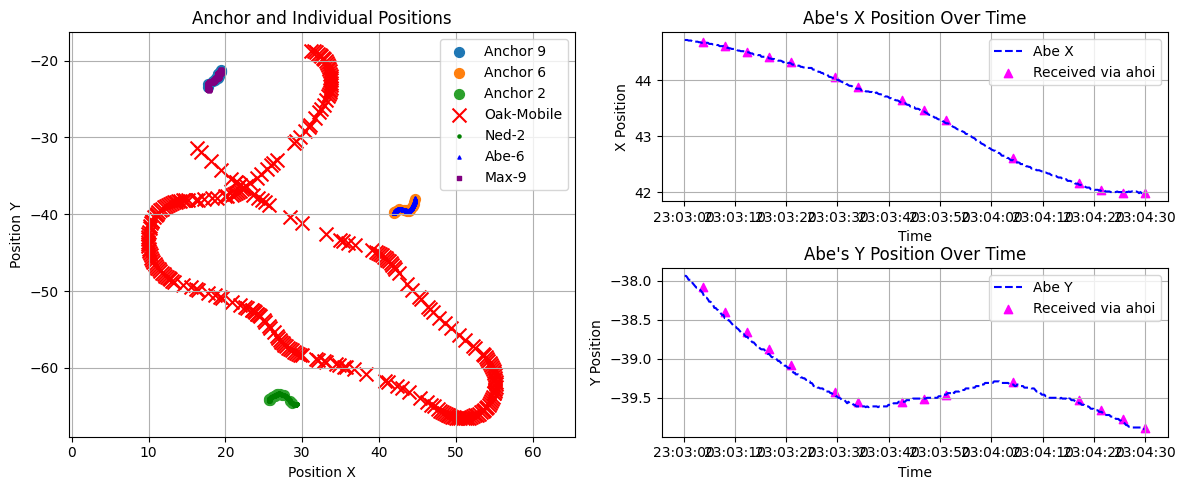

In [9]:
import matplotlib.gridspec as gridspec


# Prepare data for plotting anchor positions
pos_ack_data = ahoi_df[ahoi_df['event'] == 'POS-ACK'][['timestamp','anchor_id', 'pos_x', 'pos_y']].drop_duplicates()


# Create the plot layout using gridspec for custom layout
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Plot the anchor positions in the left subplot
ax0 = plt.subplot(gs[0])
# Plot the anchor positions in x, y
for anchor_id in pos_ack_data['anchor_id'].unique():
    anchor_pos = pos_ack_data[pos_ack_data['anchor_id'] == anchor_id]
    ax0.scatter(anchor_pos['pos_x'], anchor_pos['pos_y'], label=f'Anchor {anchor_id}', s=50)
#ax0.scatter(pos_ack_data['pos_x'], pos_ack_data['pos_y'], label='Measured Anchors', s=50, color='orange', marker='o')


# Add data for oak, ned, abe, max
if use_moos_logs:
    ax0.scatter(filtered_df_mdm_mobile['X'], filtered_df_mdm_mobile['Y'], color='red', marker='x', label='Oak-Mobile', s=100)
    ax0.scatter(filtered_df_mdm_id2['X'], filtered_df_mdm_id2['Y'], color='green', marker='o', label='Ned-2', s=5)
    ax0.scatter(filtered_df_mdm_id6['X'], filtered_df_mdm_id6['Y'], color='blue', marker='^', label='Abe-6', s=5)
    ax0.scatter(filtered_df_mdm_id9['X'], filtered_df_mdm_id9['Y'], color='purple', marker='s', label='Max-9', s=5)

ax0.set_xlabel('Position X')
ax0.set_ylabel('Position Y')
ax0.set_title('Anchor and Individual Positions')
ax0.legend()
ax0.axis('equal')
ax0.grid(True)

# Create subplots for Abe's X and Y over time stacked on the right
gs_right = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], hspace=0.4)


anchor_df = pos_ack_data[pos_ack_data['anchor_id'] == 6][['timestamp', 'pos_x', 'pos_y']]

# Plot Abe's X position over time in the first subplot on the right
ax1 = plt.subplot(gs_right[0])
if use_moos_logs:
    ax1.plot(filtered_df_mdm_id6['time'], filtered_df_mdm_id6['X'], linestyle='--',  color='blue', label='Abe X')
ax1.scatter(anchor_df['timestamp'], anchor_df['pos_x'], marker='^', color='magenta',label='Received via ahoi')
ax1.set_xlabel('Time')
ax1.set_ylabel('X Position')
ax1.set_title("Abe's X Position Over Time")
ax1.legend()
ax1.grid(True)

# Plot Abe's Y position over time in the second subplot on the right
ax2 = plt.subplot(gs_right[1])
if use_moos_logs:
    ax2.plot(filtered_df_mdm_id6['time'], filtered_df_mdm_id6['Y'], linestyle='--',  color='blue', label='Abe Y')
ax2.scatter(anchor_df['timestamp'], anchor_df['pos_y'], marker='^', color='magenta',label='Received via ahoi')
ax2.set_xlabel('Time')
ax2.set_ylabel('Y Position')
ax2.set_title("Abe's Y Position Over Time")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## EKF

### EKF-Init

In [10]:
import ahoi_ekf_base

# Initializing EKF parameters

auv_dim_state = 3
ahoi_dim_meas = 1
#EKF state: [x, y, z, roll, pitch, yaw, dx, dy, dz] #droll, dpitch, dyaw]
x0_est = np.array([20, -30, 1, 
                   0,0,0,
                   0,0,0])

p_mat_est = np.diag([15, 15, 0.0,
                     0.5,0.5,0.5,
                     0.5,0.5,0])

dt_sec = 0.05
process_noise_mat = np.diag([2, 2, 0.0,
                             0.2,0.2,0,
                             0.1])#*dt_sec
meas_noise_ahoi = 50
meas_noise_yaw = 1

### EKF-Run

In [11]:

# TODO: update also for range measurements - how old do we allow positions to be?
# TODO: change from sequences to time updates


# Create an instance of the EKF
ahoi_ekf = ahoi_ekf_base.EKF_Node(auv_dim_state, ahoi_dim_meas,
                                  process_model_type="simple",process_noise=process_noise_mat,
                                  x0_est=x0_est, p_mat_est=p_mat_est)



mobile_node_df = filtered_df_mdm_mobile

# Dictionary to store all dynamic anchor positions over sequences by anchor ID
dynamic_anchor_positions = {2: [], 6: [], 9: []}

# Color mapping for specific anchor IDs
#anchor_colors = {2: 'r', 6: 'g', 9: 'orange'}

# Iterate over each sequence number
sequence_numbers = ahoi_df['sequence_number'].unique()



### EKF Filtering
using:
* pos and ranging information only together  - results ins ca 0.5s delay for update as we have to wait for position to arrive

In [12]:
class AhoiMeasurement():
    def __init__(self):
        self.status = {0: 'inactive', 1: 'polled', 2: 'got_only_tof', 3: 'got_only_pos', 4:'got_tof_pos'}
        self.reset()

    def reset(self):
        self.measurement_status = self.status[0] # inactive
        self.meas_complete = False

        self.poll_time = None
        self.seq_id = None
        self.anchor_id = None

        self.rec_range = None
        self.rec_range_time = None

        self.rec_anchor_pos = None
        self.rec_pos_time = None

    def issued_poll(self, poll_time, seq_id, anchor_id):
        self.poll_time = poll_time
        self.seq_id = seq_id
        self.anchor_id = anchor_id

        self.measurement_status = self.status[1] # polled


    def received_range(self, rec_range, rec_range_time, seq_i):
        if self.seq_id == seq_i:
            self.rec_range = rec_range
            self.rec_range_time = rec_range_time
            self.measurement_status = self.status[2] # 'got_only_tof'

        else:
            print("Overlapping sequences")
    
    def received_pos(self, rec_pos, rec_pos_time, seq_i):
        if self.seq_id == seq_i:
            self.rec_anchor_pos = rec_pos
            self.rec_pos_time = rec_pos_time

            if self.measurement_status == 'got_only_tof':
                self.measurement_status = self.status[4] # 'got_tof_pos'
            else:
                self.measurement_status = self.status[3] # 'got_only_pos'
            self.meas_complete = (self.rec_range is not None and self.rec_anchor_pos is not None)
        else:
            print("Overlapping sequences")

    def is_complete(self):
        if self.measurement_status == 'got_tof_pos':
            return True
        else:
            return False

    def get_range(self):
        if self.rec_range == None:
            print(f'ERROR: Anchor Range is {self.rec_range} and has not been set yet for this sequence')
        return self.rec_range, self.anchor_id
    
    def get_anchor_pos(self):
        if self.rec_anchor_pos is None:
            print(f'ERROR: Anchor Pos is {self.rec_anchor_pos} and has not been set yet for this sequence')
        return self.rec_anchor_pos, self.anchor_id
    

In [13]:
#distances_combined.head(n=10)

In [14]:
#ahoi_df.head()

In [15]:
from datetime import timedelta
import time

scale_for_SoS = 1500/1500

start_time_utc = ahoi_df['timestamp'].iloc[0]
end_time_utc = ahoi_df['timestamp'].iloc[-1]
#start_time_utc = datetime(2024, 8, 5, 23, 4, 15) 
#end_time_utc = datetime(2024, 8, 5, 23, 2, 45)

dt = timedelta(seconds=dt_sec) # TODO: can currently only handle one update / data row per time step

current_time = start_time_utc
data_index = 1
gt_data_index = 4
mobile_node_data_index = 1
new_ahoi_data = False

use_data = 'ahoi' #
#use_data = 'ground_truth_dist'
event_type = ''


# List to store estimated positions
x_est_list = []
time_steps_list = []
y_delta_dist_list = []
y_update_time_list = []

debug_plotting = True
if debug_plotting:
    plt.ion()




last_time = current_time
ahoi_meas = AhoiMeasurement()
while current_time < end_time_utc: 
    current_time += dt
    # Predict the next state
    ahoi_ekf.predict(dt_sim=dt)


    
    # Store the predicted position
   
    time_steps_list.append(current_time)

    if mobile_node_data_index < len(mobile_node_df) and current_time >= mobile_node_df['time'].iloc[mobile_node_data_index]:
        current_mobile_data = mobile_node_df.iloc[mobile_node_data_index] #distances_combined['time'], distances_combined['Distance_Abe'] # ABE-6, MAX-9, NED-2
        mobile_node_data_index += 1

        mobile_hdg_deg = current_mobile_data['HDG']
        heading_rad = np.deg2rad(mobile_hdg_deg)
    
        # Map the range 0..360 deg to -pi..pi
        yaw_meas_rad = (heading_rad + np.pi) % (2 * np.pi) - np.pi

        ahoi_ekf.yaw_measurement_update(yaw_meas=yaw_meas_rad, w_mat_yaw=meas_noise_yaw)
   

    if gt_data_index < len(distances_combined) and current_time >= distances_combined['time'].iloc[gt_data_index]:
        current_gt_distances = distances_combined.iloc[gt_data_index] #distances_combined['time'], distances_combined['Distance_Abe'] # ABE-6, MAX-9, NED-2
        gt_data_index += 1
                

    # get new data from DataFrame if available
    if data_index < len(ahoi_df) and current_time >= ahoi_df['timestamp'].iloc[data_index]:
        # Get the current data row
        new_data_row = ahoi_df.iloc[data_index]

        # Move to the next data line
        data_index += 1
        new_ahoi_data = True

        event_type = new_data_row['event']
        event_time = new_data_row['timestamp']
        sequence_id = new_data_row['sequence_number']

        if event_type == 'range_poll':
            polled_anchor_id =  new_data_row['target_id']
        else:
            polled_anchor_id = new_data_row['anchor_id']
    
    if event_type == 'TOF-ACK' and use_data == 'ahoi':
        received_range = new_data_row['distance'] * scale_for_SoS
    
    elif event_type == 'TOF-ACK' and use_data == 'ground_truth_dist':
        if new_data_row['anchor_id'] == 6:
            received_range = current_gt_distances['Distance_Abe']
        elif new_data_row['anchor_id'] == 9:
            received_range = current_gt_distances['Distance_Max']
        elif new_data_row['anchor_id'] == 2:
            received_range = current_gt_distances['Distance_Ned']


    if new_ahoi_data and event_type =='range_poll':
        #print(f"got range poll for anchor {new_data_row['target_id']}")
        ahoi_meas.reset()
        ahoi_meas.issued_poll(poll_time=event_time,
                                seq_id=sequence_id, 
                                anchor_id=polled_anchor_id)
        new_ahoi_data = False
        
    elif new_ahoi_data and event_type =='TOF-ACK':
        #print(f"Anchor {new_data_row['anchor_id']} got TOF @ seq {new_data_row['sequence_number']}")
        ahoi_meas.received_range(rec_range=received_range, 
                                rec_range_time=event_time, 
                                seq_i=sequence_id)
        new_ahoi_data = False
        
    elif new_ahoi_data and event_type =='POS-ACK':
        #print(f"Anchor {new_data_row['anchor_id']} got POS @ seq {new_data_row['sequence_number']}")
        x = new_data_row['pos_x']
        y = new_data_row['pos_y']

        anchor_pos3d = np.array([x,y,0])
        #print(f"pos3d = {anchor_pos3d}, shape {anchor_pos3d.shape}")

        ahoi_meas.received_pos(rec_pos=anchor_pos3d, 
                                rec_pos_time=event_time, 
                                seq_i=sequence_id)
        new_ahoi_data = False

    x_est_list.append(ahoi_ekf.get_x_est().copy())
    if ahoi_meas.is_complete():
        meas_range, meas_anchor_id = ahoi_meas.get_range()
        # print(f"meas range from anchor {meas_anchor_id}: {meas_range}m")
       
        anchor_pos3d, meas_anchor_id = ahoi_meas.get_anchor_pos()

        y_delta_dist, z_meas, z_est_anchor = ahoi_ekf.dist_measurement_update(dist_meas=meas_range, anchor_pos=anchor_pos3d, w_mat_dist=meas_noise_ahoi)
        ahoi_meas.reset() # Measurement has been used - reset poll


        y_delta_dist_list.append((anchor_id, anchor_pos3d, y_delta_dist, z_meas, z_est_anchor))
        y_update_time_list.append((current_time))
        time_since_meas = current_time-last_time
        print(f"since last update {time_since_meas.total_seconds()}s")
        print(f"meas {meas_range:.2f}m, z_meas {z_meas:.2f}m, z_est: {z_est_anchor:.2f}, y_delta {y_delta_dist:.2f}")

        

        #print(y_delta_dist_list[-1])
        
        time_steps_array = np.array(time_steps_list)

        if debug_plotting:
            plt.clf()
            fig, ax = plt.subplots(1, 1)
            
            oak_cropped = df_mdm_mobile[(df_mdm_mobile['time'] >= start_time_utc) & (df_mdm_mobile['time'] <= current_time)]
            ax.plot(oak_cropped['X'], oak_cropped['Y'], color='purple', linestyle='-', marker='*', label='Oak')

            anchor_start= np.array([[ 44.69, -38.08],
                                    [ 19.43, -21.32],
                                    [ 28.73, -64.63]])
            
            x_est_list.append(ahoi_ekf.get_x_est().copy())
            x_est_array = np.array(x_est_list)
            ax.plot(x_est_array[:,0], x_est_array[:,1], marker='o')
            ax.plot(x_est_array[-2:,0], x_est_array[-2:,1], marker='o', color='magenta')
            ax.scatter(anchor_pos3d[0], anchor_pos3d[1], color='r')
            ax.scatter(anchor_start[:,0], anchor_start[:,1], marker='*')
            c_meas = plt.Circle((anchor_pos3d[0], anchor_pos3d[1]), z_meas, color='r', fill=False, label='z_meas')
            c_est = plt.Circle((anchor_pos3d[0], anchor_pos3d[1]), z_est_anchor, color='b', fill=False, label='z_est')
            ax.set_aspect('equal', 'box')
            ax.add_patch(c_meas)
            ax.add_patch(c_est)
            ax.legend()
            
            ax.set_xlim((0,80))
            ax.set_ylim((-80,-0))
            ax.grid()
            
            plt.show()
            plt.pause(0.5)
            plt.close(fig)
        last_time = current_time
    
    


# Convert the list of estimated positions to a NumPy array
x_est_array = np.array(x_est_list)
time_steps_array = np.array(time_steps_list)
#y_delta_dist_array = np.array(y_delta_dist_list)
#y_update_time_array = np.array(y_update_time_list)


print(f"len x : {x_est_array.shape}, len time steps {time_steps_array.shape}") #, len y_dist  {y_delta_dist_array.shape}, en y_dist_time  {y_update_time_array.shape}")

IndexError: index 5 is out of bounds for axis 0 with size 3

## EKF-Plotting

ValueError: x and y must have same first dimension, but have shapes (1784,) and (1826,)

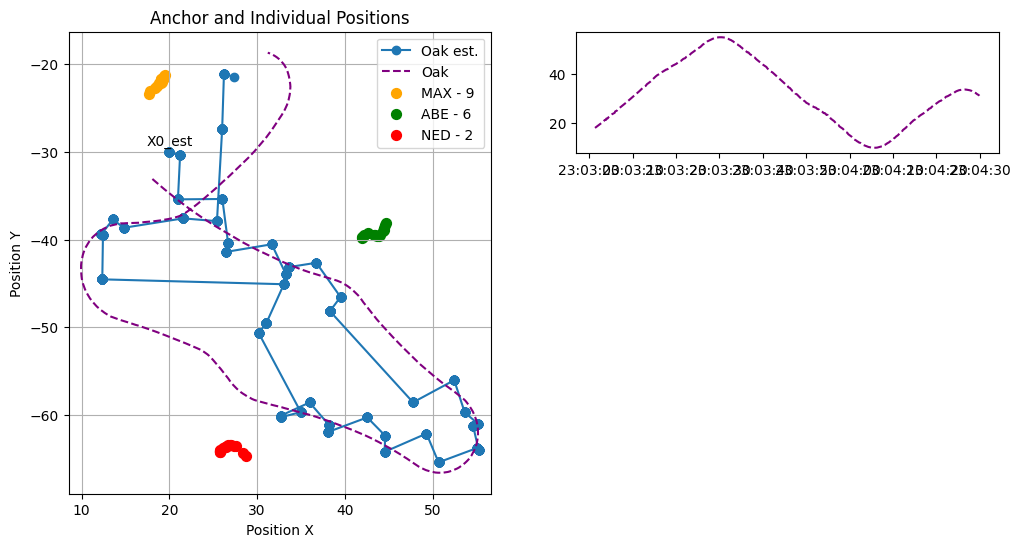

In [ ]:
# Create the plot layout using gridspec for custom layout
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Plot the anchor positions in the left subplot
ax0 = plt.subplot(gs[0])

# Plot the estimated path
ax0.plot(x_est_array[:, 0], x_est_array[:, 1], label='Oak est.', marker='o', linestyle='-')

# Annotate the estimated path with sequence numbers for every 5th sequence
n_label = 5
#for idx, (x, y) in enumerate(zip(x_est_array[:, 0], x_est_array[:, 1])):
    #if sequence_numbers[idx] % n_label == 0:
    #    ax0.annotate(str(sequence_numbers[idx]), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
ax0.annotate('X0_est', (x0_est[0], x0_est[1]), textcoords="offset points", xytext=(0, 5), ha='center')

if use_moos_logs:
    oak_cropped = df_mdm_mobile[(df_mdm_mobile['time'] >= start_time_utc) & (df_mdm_mobile['time'] <= end_time_utc)]
    ax0.plot(oak_cropped['X'], oak_cropped['Y'], color='purple', linestyle='--', label='Oak')


# Plot the anchor positions in x, y
for anchor_id in pos_ack_data['anchor_id'].unique():
    anchor_pos = pos_ack_data[pos_ack_data['anchor_id'] == anchor_id]
    ax0.scatter(anchor_pos['pos_x'], anchor_pos['pos_y'], label=f'{anchor_labels[anchor_id]}', s=50, color=anchor_colors[anchor_id])

ax0.set_xlabel('Position X')
ax0.set_ylabel('Position Y')
ax0.set_title('Anchor and Individual Positions')
ax0.legend()
ax0.axis('equal')
ax0.grid(True)

# Create subplots for Abe's X and Y over time stacked on the right
gs_right = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[1], hspace=0.4)


anchor_df = pos_ack_data[pos_ack_data['anchor_id'] == 6][['timestamp', 'pos_x', 'pos_y']]


ax1 = plt.subplot(gs_right[0])
if use_moos_logs:
    ax1.plot(oak_cropped['time'], oak_cropped['X'], linestyle='--',  color='purple', label='Oak X')
ax1.plot(time_steps_array, x_est_array[:,0], marker='^',label='Received via ahoi')
ax1.set_xlabel('Time')
ax1.set_ylabel('X Position')
ax1.set_title("X Position Over Time")
ax1.legend()
ax1.grid(True)

# Plot Abe's Y position over time in the second subplot on the right
ax2 = plt.subplot(gs_right[1])
if use_moos_logs:
    ax2.plot(oak_cropped['time'], oak_cropped['Y'], linestyle='--',  color='purple', label='Oak Y')
ax2.plot(time_steps_array, x_est_array[:,1], marker='^',label='Received via ahoi')
ax2.set_xlabel('Time')
ax2.set_ylabel('Y Position')
ax2.set_title("Y Position Over Time")
ax2.legend()
ax2.grid(True)

ax3 = plt.subplot(gs_right[2])

for anchor_id in tof_ack_data['anchor_id'].unique():
    anchor_data = tof_ack_data[tof_ack_data['anchor_id'] == anchor_id]
    ax3.scatter(anchor_data['timestamp'], anchor_data['distance']*scale_for_SoS, label=f'{anchor_labels[anchor_id]}', marker='o', color=anchor_colors[anchor_id])

if use_moos_logs:
    # NED - 2, ABE - 6, MAX - 9
    # anchor_colors = {2: 'b', 6: 'g', 9: 'orange'}
    ax3.plot(distances_combined['time'], distances_combined['Distance_Abe'], color=anchor_colors[6])
    ax3.plot(distances_combined['time'], distances_combined['Distance_Max'], color=anchor_colors[9])
    ax3.plot(distances_combined['time'], distances_combined['Distance_Ned'], color=anchor_colors[2])

ax3.set_ylabel('Distance in m')

#ax3.set_title('Distances by Anchor Over Sequence Numbers')
ax3.legend()
ax3.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
# fig = plt.figure()
# plt.plot(time_steps_array, x_est_array[:,2])

In [ ]:
# # Sequence-wise filtering- Backup
# for seq_i in sequence_numbers:
#     # Predict the next state
#     ahoi_ekf.predict(dt_sim=1)

#     # Store the predicted position
#     x_est_list.append(ahoi_ekf.get_x_est().copy())

#     # Filter the DataFrame for the current sequence number
#     seq_measurements = ahoi_df[ahoi_df['sequence_number'] == seq_i][['anchor_id', 'event', 'pos_x', 'pos_y', 'distance']]
    
#     # Get unique anchor IDs
#     anchor_ids = seq_measurements['anchor_id'].dropna().unique()
#     #print(f"seq id {seq_i}")
#     # Iterate over each unique anchor ID
#     for id in anchor_ids:
#         # Filter the DataFrame for the current anchor ID
#         anchor_meas_data = seq_measurements[seq_measurements['anchor_id'] == id][['event', 'pos_x', 'pos_y', 'distance']]
        
#         # Count the number of rows for each event type
#         tof_ack_count = len(anchor_meas_data[anchor_meas_data['event'] == 'TOF-ACK'])
#         pos_ack_count = len(anchor_meas_data[anchor_meas_data['event'] == 'POS-ACK'])
        
#         if (tof_ack_count + pos_ack_count) == 2:
#             #print(f"update anchor {id}")
#             # Extract position and distance measurements
#             anchor_pos = anchor_meas_data[anchor_meas_data['event'] == 'POS-ACK'][['pos_x', 'pos_y']].to_numpy()
#             anchor_pos3d = np.zeros((3,))
#             anchor_pos3d[0:2] = anchor_pos[0]
#             dist_meas = anchor_meas_data[anchor_meas_data['event'] == 'TOF-ACK'][['distance']].to_numpy()

#             # Store the anchor position in the dictionary
#             if id in dynamic_anchor_positions:
#                 dynamic_anchor_positions[id].append(anchor_pos3d.copy())

#             # Perform measurement update
#             ahoi_ekf.measurement_update(dist_meas=dist_meas[0], anchor_pos=anchor_pos3d, w_mat_dist=meas_noise_ahoi)

# # Convert the list of estimated positions to a NumPy array
# x_est_array = np.array(x_est_list)